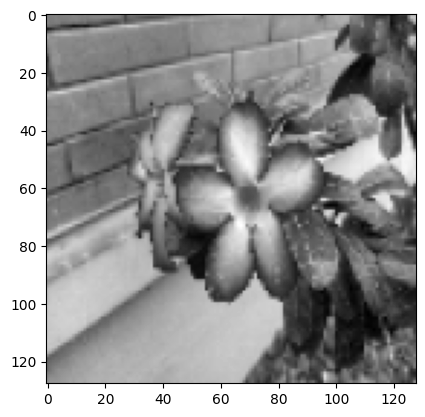

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

image = cv2.imread('gambar.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (100, 100))
resized_image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
plt.imshow(resized_image, cmap='gray')

In [12]:
def quantize_image(image, grid_size):
    h, w = image.shape
    quantized_image = np.zeros((h, w), dtype=np.uint8)
    for i in range(0, h, grid_size):
        for j in range(0, w, grid_size):
            block = image[i:min(i+grid_size, h), j:min(j+grid_size, w)]
            mean_value = np.mean(block)
            quantized_image[i:min(i+grid_size, h), j:min(j+grid_size, w)] = 255 if mean_value >= 127 else 0
    return quantized_image

def apply_threshold(image, threshold=128):
    binary_image = (image >= threshold).astype(int)
    return binary_image

def display_images(original, quantized_images, titles):
    plt.figure(figsize=(12, 8))

    plt.subplot(1, len(quantized_images) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, (img, title) in enumerate(zip(quantized_images, titles), 2):
        plt.subplot(1, len(quantized_images) + 1, i)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

def create_dataframe(quantized_image, grid_size):
    h, w = quantized_image.shape
    reshaped = quantized_image.reshape(h//grid_size, grid_size, -1, grid_size).mean(axis=(1, 3))
    df = pd.DataFrame(reshaped)
    return df

In [13]:
quantized_8x8 = quantize_image(resized_image, 8)
quantized_16x16 = quantize_image(resized_image, 16)
quantized_32x32 = quantize_image(resized_image, 32)

In [14]:
binary_8x8 = apply_threshold(quantized_8x8)
binary_16x16 = apply_threshold(quantized_16x16)
binary_32x32 = apply_threshold(quantized_32x32)

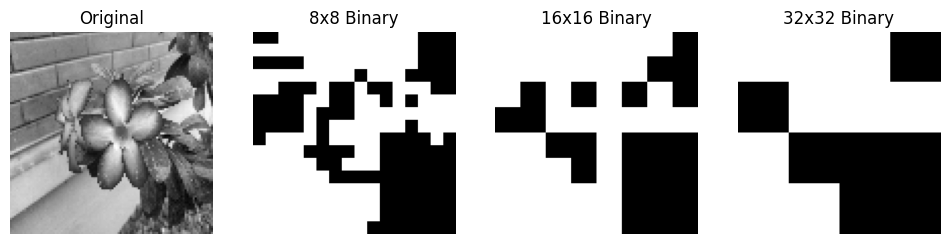

In [15]:
display_images(image, [binary_8x8, binary_16x16, binary_32x32], ['8x8 Binary', '16x16 Binary', '32x32 Binary'])


In [21]:
df = create_dataframe(quantized_8x8, 8)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0
4,255.0,255.0,0.0,0.0,0.0,255.0,0.0,0.0,255.0,0.0,0.0,255.0,255.0,255.0,0.0,0.0
5,0.0,0.0,0.0,0.0,255.0,255.0,0.0,0.0,255.0,255.0,0.0,255.0,0.0,255.0,255.0,255.0
6,0.0,0.0,0.0,0.0,255.0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
7,0.0,0.0,0.0,0.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,255.0,255.0,255.0
8,0.0,255.0,255.0,255.0,255.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,255.0,0.0
9,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df2 = create_dataframe(quantized_16x16, 16)
df2

,0,1,2,3,4,5,6,7
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0
2,255.0,0.0,255.0,0.0,255.0,0.0,255.0,0.0
3,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,0.0,0.0,255.0,0.0,0.0,0.0
5,255.0,255.0,255.0,0.0,255.0,0.0,0.0,0.0
6,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
7,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0


In [20]:
df3 = create_dataframe(binary_32x32, 32)
df3

,0,1,2,3
0,1.0,1.0,1.0,0.0
1,0.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0
